In [143]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

### Analyse the data

In [3]:
tips = sns.load_dataset('tips')
df=pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
#Describe the category
df.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [5]:
#Describe category name
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['day'].unique())
print(df['time'].unique())

['Female', 'Male']
Categories (2, object): ['Male', 'Female']
['No', 'Yes']
Categories (2, object): ['Yes', 'No']
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']


### Preprocessing Step

In [7]:
# Encode categorical variables
le = LabelEncoder()
df['day'] = le.fit_transform(df['day'])
df['smoker'] = le.fit_transform(df['smoker'])

In [8]:
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import make_column_transformer

In [9]:
one_he=OneHotEncoder()
df1=make_column_transformer(
    (one_he,['sex','time']),remainder='passthrough')

In [10]:
#Change the columns name based on "encoded_data"
final_data=pd.DataFrame(df1.fit_transform(df),columns=['GenderFemail','GenderMale','Dinner','Lunch','total_bill',
                                                           'tip','Smoker','day','size'])
final_data

,GenderFemail,GenderMale,Dinner,Lunch,total_bill,tip,Smoker,day,size
0,1.0,0.0,1.0,0.0,16.99,1.01,0.0,2.0,2.0
1,0.0,1.0,1.0,0.0,10.34,1.66,0.0,2.0,3.0
2,0.0,1.0,1.0,0.0,21.01,3.50,0.0,2.0,3.0
3,0.0,1.0,1.0,0.0,23.68,3.31,0.0,2.0,2.0
4,1.0,0.0,1.0,0.0,24.59,3.61,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,29.03,5.92,0.0,1.0,3.0
240,1.0,0.0,1.0,0.0,27.18,2.00,1.0,1.0,2.0
241,0.0,1.0,1.0,0.0,22.67,2.00,1.0,1.0,2.0
242,0.0,1.0,1.0,0.0,17.82,1.75,0.0,1.0,2.0


In [11]:
final_data['Smoker'] = final_data['Smoker'].astype(int)
final_data

,GenderFemail,GenderMale,Dinner,Lunch,total_bill,tip,Smoker,day,size
0,1.0,0.0,1.0,0.0,16.99,1.01,0,2.0,2.0
1,0.0,1.0,1.0,0.0,10.34,1.66,0,2.0,3.0
2,0.0,1.0,1.0,0.0,21.01,3.50,0,2.0,3.0
3,0.0,1.0,1.0,0.0,23.68,3.31,0,2.0,2.0
4,1.0,0.0,1.0,0.0,24.59,3.61,0,2.0,4.0
...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,29.03,5.92,0,1.0,3.0
240,1.0,0.0,1.0,0.0,27.18,2.00,1,1.0,2.0
241,0.0,1.0,1.0,0.0,22.67,2.00,1,1.0,2.0
242,0.0,1.0,1.0,0.0,17.82,1.75,0,1.0,2.0


In [13]:
# Define features and target
features = ['total_bill', 'tip', 'day', 'size']
x = final_data[features]
y = final_data['Smoker'] #Targetvariable

In [14]:
#Counter module to count each class 
from collections import Counter
Counter(final_data['Smoker'])

Counter({0: 151, 1: 93})

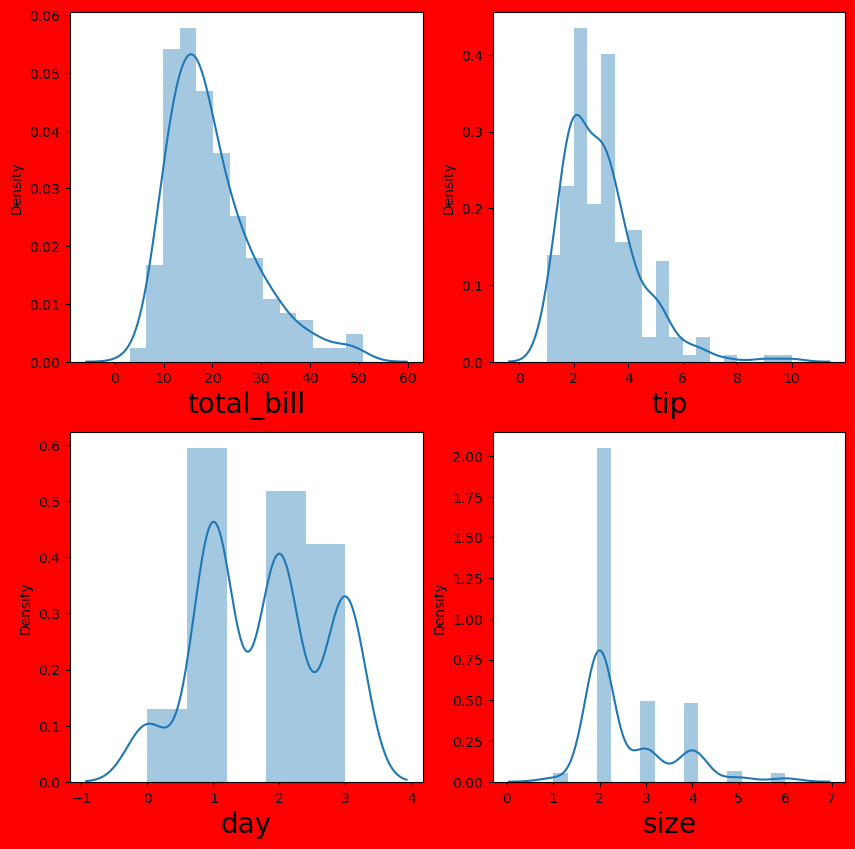

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10),facecolor='red')
plotnumber=1
for column in x:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
#Now use standard scaler and standardized the data

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [18]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')

'''
Parameters
Method='box-cox' or 'yeo-jhonson'
'''

"\nParameters\nMethod='box-cox' or 'yeo-jhonson'\n"

In [19]:
final_data[features]=scaler.fit_transform(final_data[features].values)
x=final_data[features]
x

,total_bill,tip,day,size
0,-0.146272,-2.268391,0.291791,-0.561009
1,-1.263499,-1.156975,0.291791,0.768083
2,0.343298,0.594096,0.291791,0.768083
3,0.621586,0.465097,0.291791,-0.561009
4,0.709646,0.665257,0.291791,1.478337
...,...,...,...,...
239,1.099066,1.755989,-0.792952,0.768083
240,0.944244,-0.720096,-0.792952,-0.561009
241,0.519996,-0.720096,-0.792952,-0.561009
242,-0.036853,-1.033811,-0.792952,-0.561009


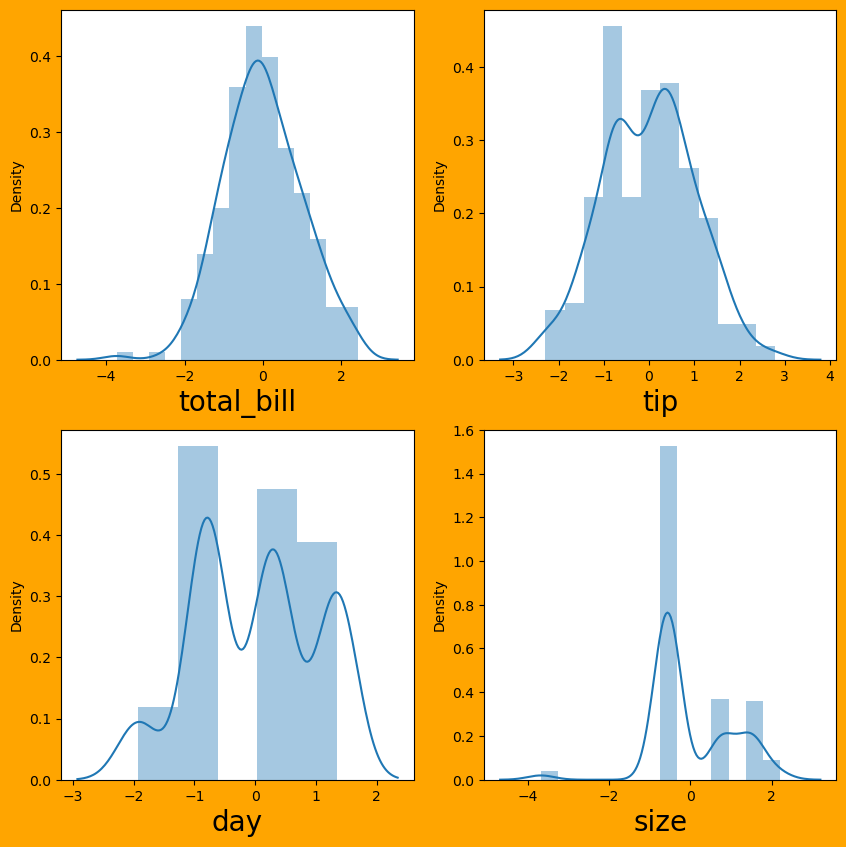

In [20]:
#Lets plot the Dist plot using plt.figure
plt.figure(figsize=(10,10),facecolor='orange')
plotnumber = 1
for column in features:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [21]:
# We normalized the data using 'yeo-johnson' method, good to process

### Appliying the Models

#### 1. Logistic Regression

In [24]:
# Split dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=355)

In [25]:
# Train logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [26]:
def metrics_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("=====================Training Score================")
        print("Accuracy Score==> ",accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=model.predict(x_test)
        print("===================Testing Score====================")
        print("Accuracy Score ==> ",accuracy_score(y_test,pred)*100)
        print("Classification Score==> ",classification_report(y_test,pred))

In [27]:
from sklearn.metrics import accuracy_score,classification_report
metrics_score(model,x_train,x_test,y_train,y_test,train=True)
metrics_score(model,x_train,x_test,y_train,y_test,train=False)

=====================Training Score================
Accuracy Score==>  64.48087431693989
===================Testing Score====================
Accuracy Score ==>  78.68852459016394
Classification Score==>                precision    recall  f1-score   support

           0       0.80      0.90      0.85        41
           1       0.73      0.55      0.63        20

    accuracy                           0.79        61
   macro avg       0.77      0.73      0.74        61
weighted avg       0.78      0.79      0.78        61



In [28]:
# Our model is overfitted
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [29]:
lasso = Lasso(max_iter=100)
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

In [30]:
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=7, scoring='r2')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=Lasso(max_iter=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='r2')

In [31]:
tuned_model = grid_search.best_estimator_

In [32]:
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
metrics_score(model,x_train,x_test,y_train,y_test,train=True)
metrics_score(model,x_train,x_test,y_train,y_test,train=False)

=====================Training Score================
Accuracy Score==>  64.48087431693989
===================Testing Score====================
Accuracy Score ==>  78.68852459016394
Classification Score==>                precision    recall  f1-score   support

           0       0.80      0.90      0.85        41
           1       0.73      0.55      0.63        20

    accuracy                           0.79        61
   macro avg       0.77      0.73      0.74        61
weighted avg       0.78      0.79      0.78        61



In [34]:
model_train_accuray=(model.score(x_train,y_train)*100)
model_train_accuray

64.48087431693989

In [35]:
model_test_accuray=(model.score(x_test,y_test)*100)
model_test_accuray

78.68852459016394

#### 2.Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
# We can try 'vif' in our model

In [40]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['columns']=x.columns
vif

,vif,columns
0,2.245784,total_bill
1,1.879336,tip
2,1.016439,day
3,1.612654,size


In [41]:
# Our vif for selected data is ok, so we can go forward

In [42]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [43]:
def metrics_score(rf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=rf.predict(x_train)
        print("=====================Training Score================")
        print("Accuracy Score==> ",accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=rf.predict(x_test)
        print("===================Testing Score====================")
        print("Accuracy Score ==> ",accuracy_score(y_test,pred)*100)
        print("Classification Score==> ",classification_report(y_test,pred))

In [44]:
metrics_score(rf,x_train,x_test,y_train,y_test,train=True)
metrics_score(rf,x_train,x_test,y_train,y_test,train=False)

=====================Training Score================
Accuracy Score==>  100.0
===================Testing Score====================
Accuracy Score ==>  70.49180327868852
Classification Score==>                precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.55      0.55      0.55        20

    accuracy                           0.70        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.70      0.70      0.70        61



In [45]:
# Our model is overfitted so we perform hyperparameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV
best_param={'n_estimators':[13,14],
           'criterion':['entropy','gini'],
           'min_samples_split':[12,14],
           'min_samples_leaf':[14,16],
            'max_depth':[12,4]}

In [47]:
grid_search=GridSearchCV(estimator=rf,param_grid=best_param,cv=2)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 16,
 'min_samples_split': 12,
 'n_estimators': 14}

In [48]:
rf=grid_search.best_estimator_

In [49]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=16,
                       min_samples_split=12, n_estimators=14)

In [50]:
rf.score(x_train,y_train)

0.7103825136612022

In [51]:
metrics_score(rf,x_train,x_test,y_train,y_test,train=True)
metrics_score(rf,x_train,x_test,y_train,y_test,train=False)

=====================Training Score================
Accuracy Score==>  71.03825136612022
===================Testing Score====================
Accuracy Score ==>  75.40983606557377
Classification Score==>                precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.65      0.55      0.59        20

    accuracy                           0.75        61
   macro avg       0.72      0.70      0.71        61
weighted avg       0.75      0.75      0.75        61



In [52]:
rf_train_accuray=(rf.score(x_train,y_train)*100)
rf_train_accuray

71.03825136612022

In [53]:
rf_test_accuray=(rf.score(x_test,y_test)*100)
rf_test_accuray

75.40983606557377

#### 3. KNeighborsClassifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [57]:
def metrics_score(knn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=knn.predict(x_train)
        print('==================Training Data====================')
        print(f"Accuracy Score ==>{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=knn.predict(x_test)
        print("==================Testing Score======================")
        print(f"Accuracy Score ===>{accuracy_score(y_test,pred)*100:.2f}%")
        print(f"Classification Report===>{classification_report(y_test,pred)}")

In [58]:
metrics_score(knn,x_train,x_test,y_train,y_test,train=True)
metrics_score(knn,x_train,x_test,y_train,y_test,train=False)

==================Training Data====================
Accuracy Score ==>75.96%
==================Testing Score======================
Accuracy Score ===>73.77%
Classification Report===>              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.60      0.60      0.60        20

    accuracy                           0.74        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.74      0.74      0.74        61



In [59]:
#We can check this model is overfitted or not using crossvalidation kfold method

In [60]:
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=2).mean()*100

61.88524590163935

In [61]:
# Our model is overfitted so we perform hyperparameter tuning

In [62]:
from sklearn.model_selection import GridSearchCV
best_param={'algorithm':['kd_tree','brute'],
           'leaf_size':[3,5,4,7,8],
           'n_neighbors':[8,9,7,4,5,6,4]}

In [63]:
grid_search=GridSearchCV(estimator=knn,param_grid=best_param)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 8}

In [64]:
knn.score(x_train,y_train)

0.7595628415300546

In [65]:
metrics_score(knn,x_train,x_test,y_train,y_test,train=True)
metrics_score(knn,x_train,x_test,y_train,y_test,train=False)

==================Training Data====================
Accuracy Score ==>75.96%
==================Testing Score======================
Accuracy Score ===>73.77%
Classification Report===>              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.60      0.60      0.60        20

    accuracy                           0.74        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.74      0.74      0.74        61



In [66]:
knn_train_accuracy=(knn.score(x_train,y_train)*100)
knn_train_accuracy

75.95628415300546

In [67]:
knn_test_accuracy=(knn.score(x_test,y_test)*100)
knn_test_accuracy

73.77049180327869

In [71]:
accuracy = pd.DataFrame({
    'Model': models,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

print(accuracy)

                Model  Train Accuracy  Test Accuracy
0  Logistic_egression       64.480874      78.688525
1       Random Forest       71.038251      75.409836
2          KNeighbors       75.956284      73.770492


### Dealing with imbalanced Dataset

<Axes: xlabel='Smoker', ylabel='count'>

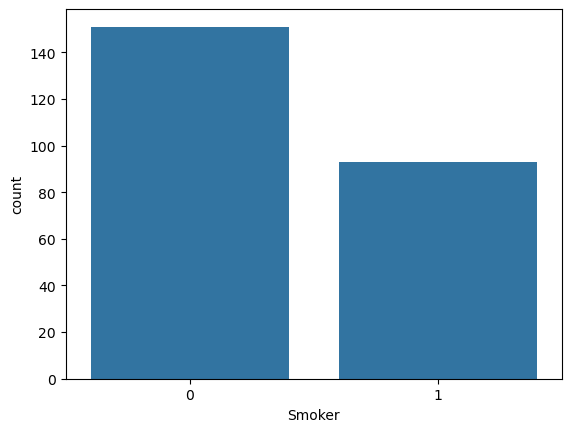

In [76]:
sns.countplot(x='Smoker',data=final_data)

In [80]:
#Counter module to count each class 
from collections import Counter
Counter(final_data['Smoker'])

Counter({0: 151, 1: 93})

In [82]:
# Up Sampling using SMOTE

In [116]:
y_test.value_counts()

Smoker
0    41
1    20
Name: count, dtype: int64

In [122]:
# Use KNeighborsClassifier for prediction
from sklearn.neighbors import KNeighborsClassifier

In [124]:
#import SMOTE
from imblearn.over_sampling import SMOTE

In [126]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [128]:
smote=SMOTE(k_neighbors=4)

In [130]:
x_train_ns,y_train_ns=smote.fit_resample(x_train,y_train)

In [132]:
print("The Number of Classes before fit {}".format(Counter(y_train)))
print("The Number of Classed after fit{}".format(Counter(y_train_ns)))

The Number of Classes before fit Counter({0: 110, 1: 73})
The Number of Classed after fitCounter({0: 110, 1: 110})


In [135]:
knn = KNeighborsClassifier()

In [137]:
knn.fit(x_train_ns, y_train_ns)

KNeighborsClassifier()

In [139]:
y_pred = knn.predict(x_test_scaled)

In [141]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.639344262295082

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.66      0.71        41
           1       0.46      0.60      0.52        20

    accuracy                           0.64        61
   macro avg       0.62      0.63      0.62        61
weighted avg       0.67      0.64      0.65        61

